# Сборный проект

<b>Сборный проект</b>   

<b>Анализ и прогнозирование деятельности работы интернет-магазина игр</b> 

<b>Текст задания:</b>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<b>Описание данных:</b>   
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.  

## Импорт инструментов и базы данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

In [2]:
data= pd.read_csv('/datasets/games.csv') 

Импортированы инструменты для предобработки данных, их визуализации и расчетов значений.

## Предобработка данных

In [3]:


display(data.head(10))


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Форматируем названия столбцов

In [4]:
data = data.rename(columns={'Name': 'name', 
                            'Platform': 'platform',
                            'Year_of_Release': 'year_of_release',
                            'Genre': 'genre',
                            'NA_sales': 'na_sales',
                            'EU_sales': 'eu_sales',
                            'JP_sales': 'jp_sales',
                            'Other_sales': 'other_sales',
                            'Critic_Score': 'critic_score',
                            'User_Score': 'user_score',
                            'Rating': 'rating'})

display(data.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Работа с типами данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Считаю что изменить тип данных нужно у столбца с пользовательнским рейтингом, так как он должен иметь численное выражение для дальнейшего анализа.

Возможно стоит заменить на временной формат столбец с годом выхода, однако в нашем случе дан только год, а поэтому для анализа не критично его существование в формате числа.

In [6]:

display('Уникальные значения года релиза', data['user_score'].unique())
#data['user_score'] = data['user_score'].astype('float64')
#data['user_score'] = data['user_score'] *10


'Уникальные значения года релиза'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

In [7]:
data['user_score'] = data['user_score'].astype (str).str.replace('tbd','NaN')
display('Уникальные значения user_score', data['user_score'].unique())
data['user_score'] = data['user_score'].astype('float64')
data['user_score'] = data['user_score'] *10

display('Уникальные значения года user_score', data['user_score'].unique())

'Уникальные значения user_score'

array(['8', 'nan', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'NaN', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'Уникальные значения года user_score'

array([80., nan, 83., 85., 66., 84., 86., 77., 63., 74., 82., 90., 79.,
       81., 87., 71., 34., 53., 48., 32., 89., 64., 78., 75., 26., 72.,
       92., 70., 73., 43., 76., 57., 50., 91., 65., 88., 69., 94., 68.,
       61., 67., 54., 40., 49., 45., 93., 62., 42., 60., 37., 41., 58.,
       56., 55., 44., 46., 59., 39., 31., 29., 52., 33., 47., 51., 35.,
       25., 19., 30., 27., 22., 20., 95., 21., 36., 28., 18., 38.,  0.,
       16., 96., 24., 17., 11.,  3., 15.,  7., 12., 23.,  5., 13.,  2.,
        6., 14.,  9., 10., 97.])

In [9]:
display(data.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Добавление стобца с общей выручкой

In [10]:
data['total_sales'] = data['na_sales'] +data['eu_sales']+data['jp_sales']+data['other_sales']
# Добавим столбец с суммарными продажами

### Работа с пропусками и дупликатами

In [11]:
data.isna().sum() #Кол-во пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
total_sales           0
dtype: int64

In [12]:
data = data.dropna(subset = ['name']) #Удалим строки в которых не указано название игры
#Заполним пропуски в годе релиза значением 0, чтобы в дальнейшем отсеять их
data.dropna (subset=['year_of_release'])


data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


In [13]:
data['rating'].fillna(value='пусто', inplace= True)

In [14]:

display('Уникальные значения года релиза', data['year_of_release'].unique())
display('Уникальные значения рейтинга', data['rating'].unique())

'Уникальные значения года релиза'

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

'Уникальные значения рейтинга'

array(['E', 'пусто', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [15]:
data.duplicated().sum()

0

In [16]:
display(data.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,пусто,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,пусто,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,пусто,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,пусто,28.31


Дубликатов в таблице не обнаружено

### Вывод по предобработке
Заменил названия столбцов  
Преобразовал столбец с рейтингом пользователей в вид, соответсвующий рейтингу критиков для удобства оценки.

Обработал пропуски, там где была возможность это сделать- заполнил их, в столбцах с рейтингом пропусков слишком много для заполнения, а возможности заполнить их тем или иным способом нет без подключения дополнительных баз данных, скорее всего столь большое количество пропусков связано с непопулярностью отдельных игр, находящихся в таблице.

Большое количество пропусков присутсвует в разделах с возрастным рейтингом, возможно это связано с тем что некоторые игры не проходили классификацию по системе, которая учитывается в данном наборе данных, либо данные о их лицензиях не были занесены в таблицу по иным причинам, так или иначе связанным с человеческим фактором.

Добавил столбец с общей выручкой каждой конкретной игры

## Исследовательский анализ данных

### Поиск данных актуальных для рассматриваемого вопроса.

In [17]:
data_year = data.groupby(by='year_of_release')['year_of_release'].count()
display(data_year)


year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

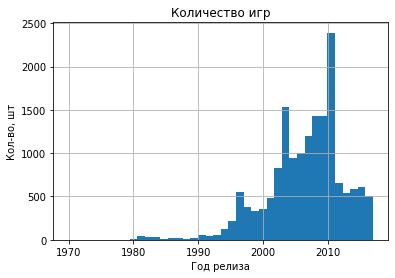

<Figure size 2880x1440 with 0 Axes>

In [18]:
data['year_of_release'].hist(bins = 40, range=(1970, 2017))
plt.title('Количество игр')
plt.xlabel('Год релиза')
plt.ylabel('Кол-во, шт')
plt.figure(figsize=(40,20))
plt.show()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

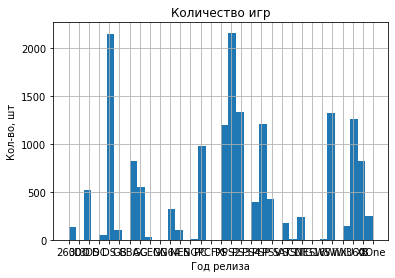

<Figure size 2880x1440 with 0 Axes>

In [19]:
data_platform = data['platform'].value_counts()
display(data_platform)
data['platform'].sort_values().hist(bins = 40)
plt.title('Количество игр')
plt.xlabel('Год релиза')
plt.ylabel('Кол-во, шт')
plt.figure(figsize=(40,20))
plt.show()

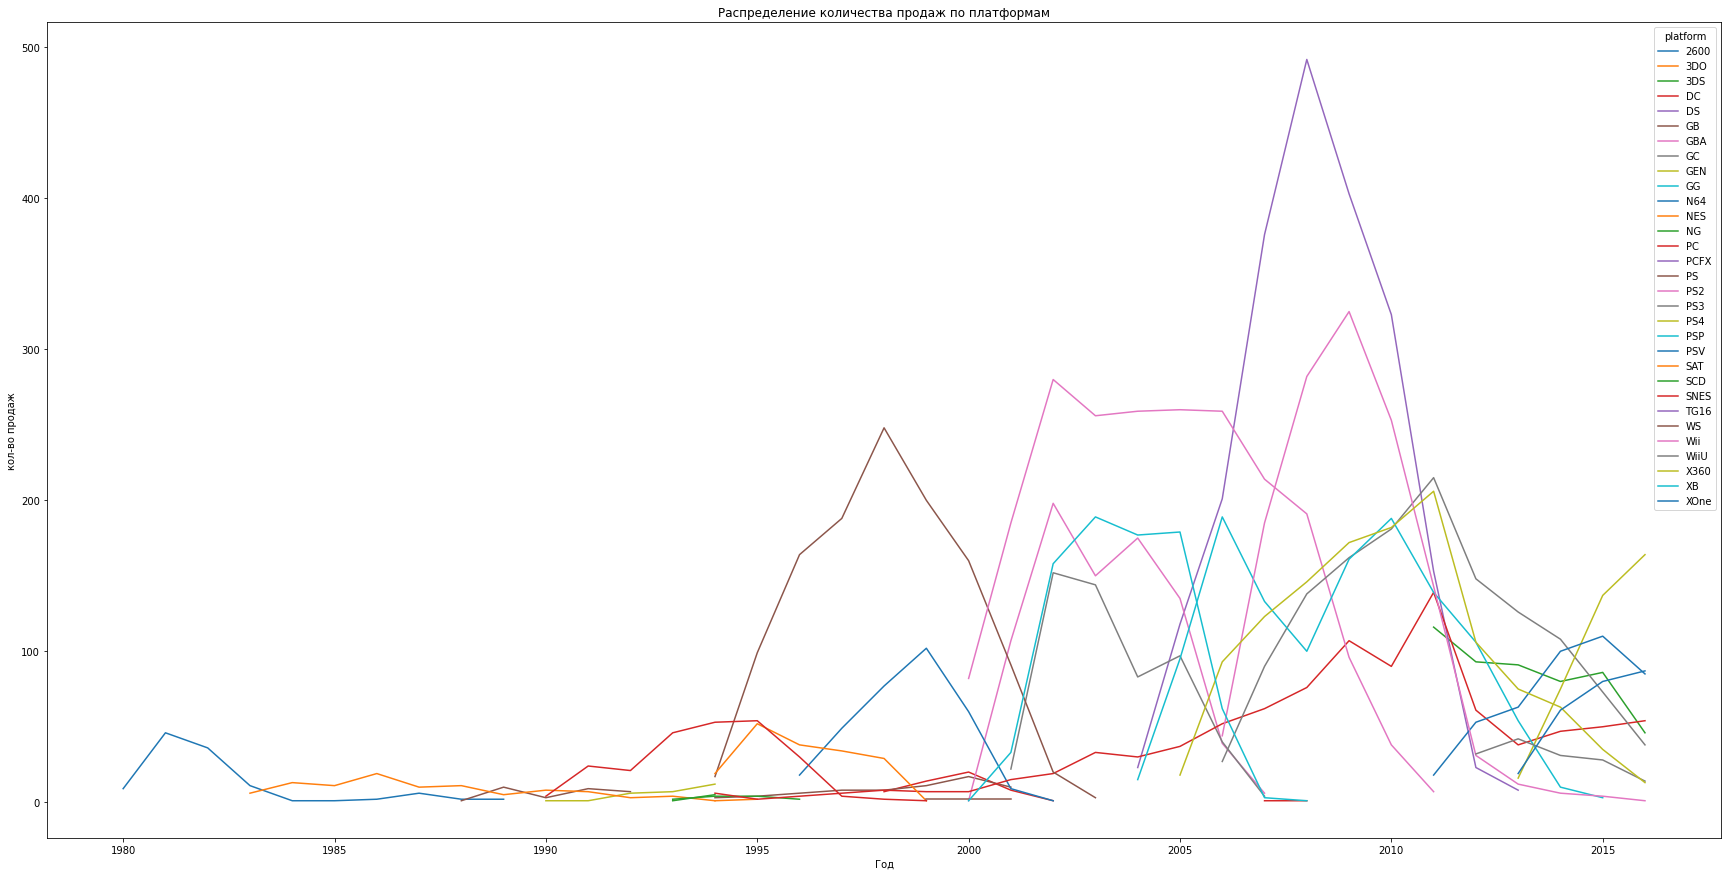

In [20]:
data.pivot_table(index='year_of_release',
                         columns = 'platform',
                         values='total_sales',
                         aggfunc='count').plot(figsize=(30, 15))

plt.title('Распределение количества продаж по платформам')
plt.xlabel('Год')
plt.ylabel('кол-во продаж')


plt.show()

In [21]:
data1= data.query("`platform` ==  'PS2' ")  
print('промежуток использования:',data1['year_of_release'].max()-data1['year_of_release'].min() )

промежуток использования: 11.0


In [22]:
data1= data.query("`platform` ==  'DS'")  
#display(data1['year_of_release'].value_counts())
print('промежуток использования:',data1['year_of_release'].max()-data1['year_of_release'].min() )

промежуток использования: 28.0


In [23]:
data1= data.query("`platform` ==  'PS3'")  
#display(data1['year_of_release'].value_counts())
print('промежуток использования:',data1['year_of_release'].max()-data1['year_of_release'].min() )

промежуток использования: 10.0


In [24]:
data1= data.query("`platform` ==  'Wii'")  
#display(data1['year_of_release'].value_counts())
print('промежуток использования:',data1['year_of_release'].max()-data1['year_of_release'].min() )

промежуток использования: 10.0


In [25]:
data1= data.query("`platform` ==  'X360'")  
#display(data1['year_of_release'].value_counts())
print('промежуток использования:',data1['year_of_release'].max()-data1['year_of_release'].min() )

промежуток использования: 11.0


In [26]:
data1= data.query("`platform` ==  'PSP'")  
#display(data1['year_of_release'].value_counts())
print('промежуток использования:',data1['year_of_release'].max()-data1['year_of_release'].min() )

промежуток использования: 11.0


In [27]:
data1= data.query("`platform` ==  'PS'")  
#display(data1['year_of_release'].value_counts())
print('промежуток использования:',data1['year_of_release'].max()-data1['year_of_release'].min() )

промежуток использования: 9.0


Среддний промежуток использования платформы 10 лет, следовательно для исследования берем платформы, которые были выпущены после 2006 года.  
Учитывая приложенные замечания можно сократить рассматриваемый период до 5 лет, следовательно в альнейшем будем рассматривать период с 2012 года по 2017

In [28]:
data_in_work = data.pivot_table(index=['platform'],
                                values='year_of_release',
                                aggfunc={'count','min'})
data_in_work = data_in_work.rename(columns={'count':'total_games','min':'min_year' })
data_in_work= data_in_work.query("`min_year` >=  2012")


display(data_in_work)
data_in_work.describe()

,total_games,min_year
platform,,
PS4,392,2013.0
WiiU,147,2012.0
XOne,247,2013.0


,total_games,min_year
count,3.00000,3.000000
mean,262.00000,2012.666667
std,123.18685,0.577350
min,147.00000,2012.000000
25%,197.00000,2012.500000
50%,247.00000,2013.000000
75%,319.50000,2013.000000
max,392.00000,2013.000000


Выяснили какие платформы актуальны для исследования, отфильтруем основную таблицу (Также стоит добавить платформу PC, так как она не привязана к поколениям как консоли, поэтому остается актуальной всегда

In [29]:
data_in_work= data.query("platform in ('PS4','WiiU','XOne','PC') ")
data_in_work= data_in_work.query("`year_of_release` >=  2012")
display(data_in_work.head(15))
data_in_work.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,пусто,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,пусто,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,57.0,M,7.66
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,50.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,пусто,7.39
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,65.0,M,7.17
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,91.0,E,7.09
143,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,82.0,57.0,E,6.08


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 31 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1036 non-null   object 
 1   platform         1036 non-null   object 
 2   year_of_release  1036 non-null   float64
 3   genre            1036 non-null   object 
 4   na_sales         1036 non-null   float64
 5   eu_sales         1036 non-null   float64
 6   jp_sales         1036 non-null   float64
 7   other_sales      1036 non-null   float64
 8   critic_score     709 non-null    float64
 9   user_score       745 non-null    float64
 10  rating           1036 non-null   object 
 11  total_sales      1036 non-null   float64
dtypes: float64(8), object(4)
memory usage: 105.2+ KB


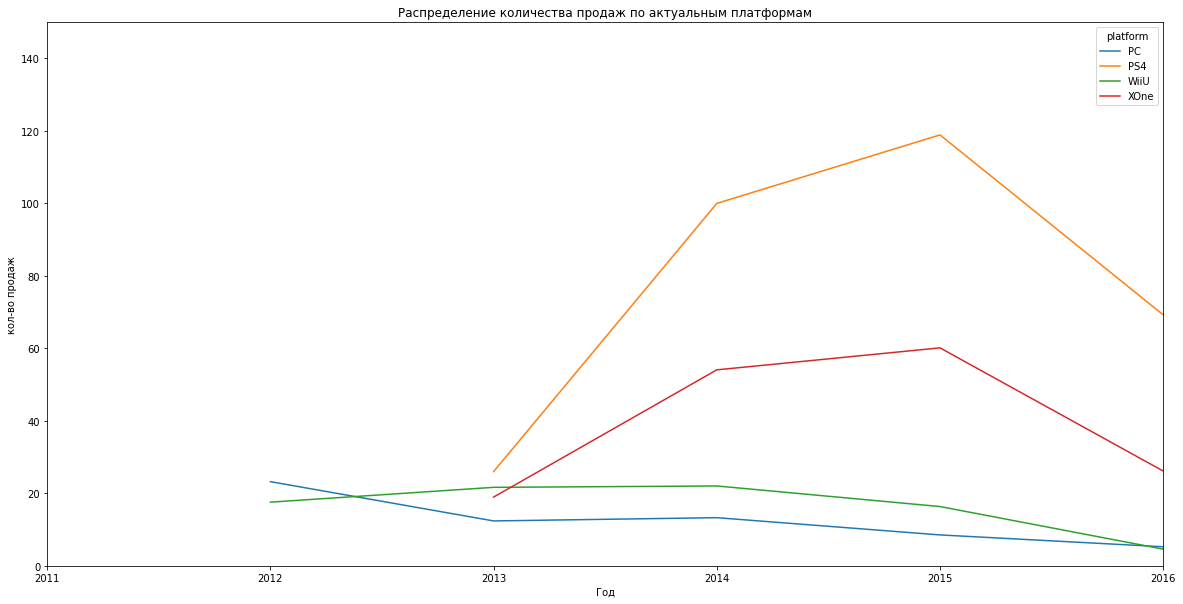

In [30]:
data_in_work.pivot_table(index='year_of_release',
                         columns = 'platform',
                         values='total_sales',
                         aggfunc='sum').plot(figsize=(20, 10))

plt.title('Распределение количества продаж по актуальным платформам')
plt.xlabel('Год')
plt.ylabel('кол-во продаж')
plt.xlim(2011, 2016)
plt.ylim(0, 150)
plt.show()

### Рассмотрение отсеянных данных

Набор данных ограничен платформами актуальными для целей установленных заданием.

Рассмотрим платформы по продажам.

In [31]:
data_in_PС= data_in_work.query("platform =='PC' ")

<AxesSubplot:>

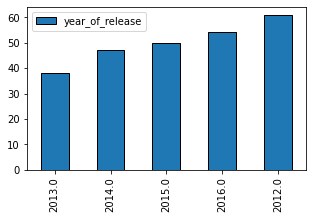

In [32]:
adata_in_PС = data_in_PС['year_of_release'].value_counts(ascending=True)



adata_in_PС.plot.bar(figsize=(5, 3), ec='black', legend=True)


,total_sales
year_of_release,
2012.0,23.22
2013.0,12.38
2014.0,13.28
2015.0,8.52
2016.0,5.25


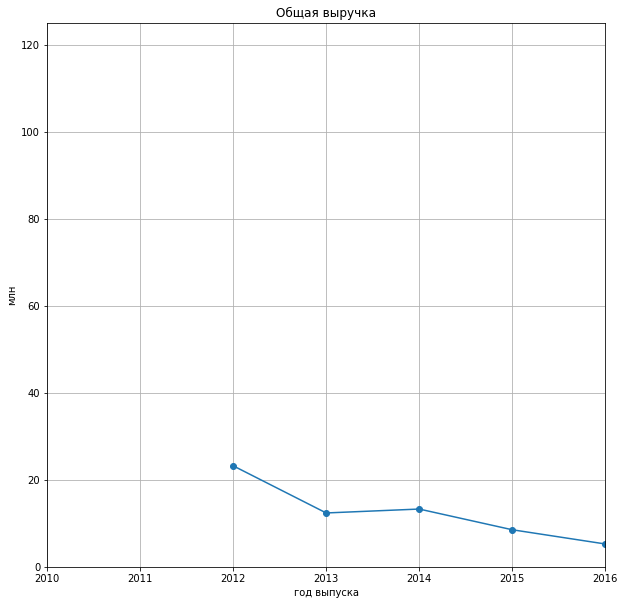

In [33]:
data_actual_PС = data_in_PС.pivot_table(index='year_of_release',
                                values='total_sales',
                                aggfunc={'sum'})
data_actual_PС = data_actual_PС.rename(columns={'sum':'total_sales' })
display(data_actual_PС)

data_actual_PС.plot(y = 'total_sales',marker='o', grid=True, figsize=(10, 10), legend=False)
plt.title('Общая выручка')
plt.xlabel('год выпуска')
plt.ylabel('млн')
plt.xlim(2010, 2016)
plt.ylim(0, 125)
plt.show()

<AxesSubplot:>

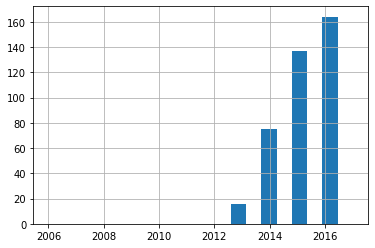

In [34]:
data_in_PS4= data_in_work.query("platform =='PS4' ")
data_in_PS4['year_of_release'].hist(bins = 20, range=(2006, 2017))

,total_sales
year_of_release,
2013.0,25.99
2014.0,100.00
2015.0,118.90
2016.0,69.25


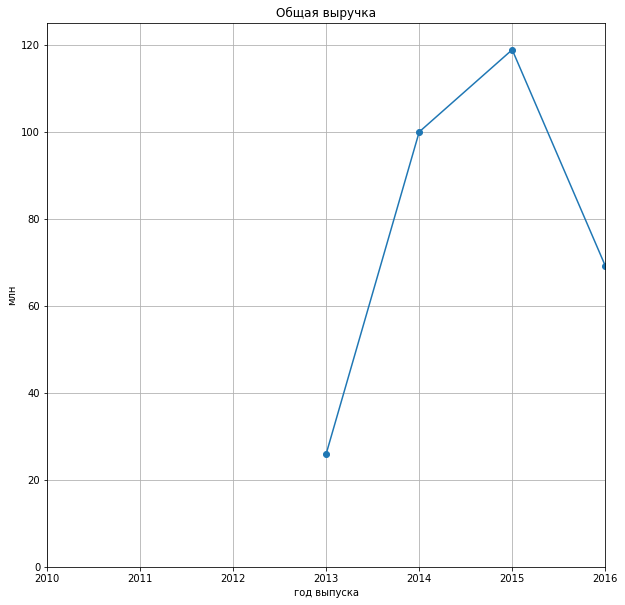

In [35]:
data_actual_PS4 = data_in_PS4.pivot_table(index='year_of_release',
                                values='total_sales',
                                aggfunc={'sum'})
data_actual_PS4 = data_actual_PS4.rename(columns={'sum':'total_sales' })
display(data_actual_PS4)

data_actual_PS4.plot(y = 'total_sales',marker='o', grid=True, figsize=(10, 10), legend=False)
plt.title('Общая выручка')
plt.xlabel('год выпуска')
plt.ylabel('млн')
plt.xlim(2010, 2016)
plt.ylim(0, 125)
plt.show()

<AxesSubplot:>

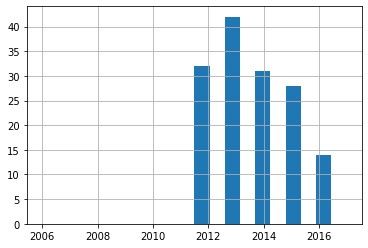

In [36]:
data_in_WiiU= data_in_work.query("platform == 'WiiU' ")
data_in_WiiU['year_of_release'].hist(bins = 20, range=(2006, 2017))

,total_sales
year_of_release,
2012.0,17.56
2013.0,21.65
2014.0,22.03
2015.0,16.35
2016.0,4.60


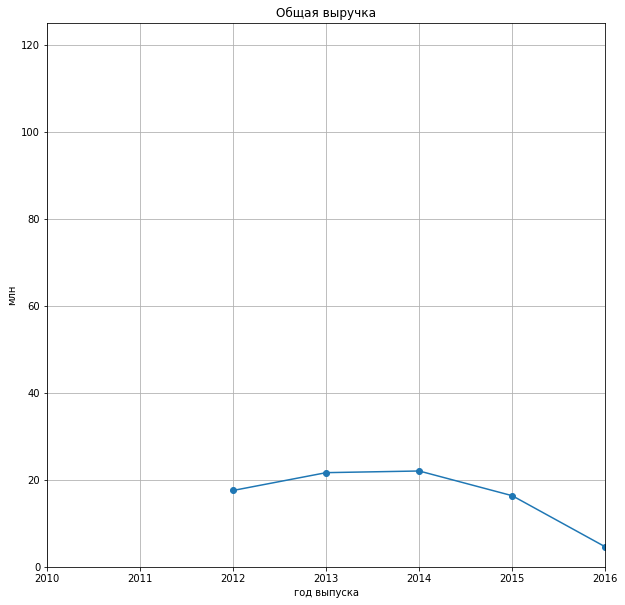

In [37]:
data_actual_WiiU = data_in_WiiU.pivot_table(index='year_of_release',
                                values='total_sales',
                                aggfunc={'sum'})
data_actual_WiiU = data_actual_WiiU.rename(columns={'sum':'total_sales' })
display(data_actual_WiiU)

data_actual_WiiU.plot(y = 'total_sales',marker='o', grid=True, figsize=(10, 10), legend=False)
plt.title('Общая выручка')
plt.xlabel('год выпуска')
plt.ylabel('млн')
plt.xlim(2010, 2016)
plt.ylim(0, 125)
plt.show()

<AxesSubplot:>

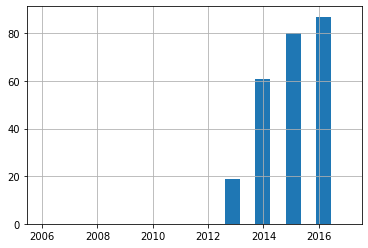

In [38]:
data_in_XOne= data_in_work.query("platform =='XOne' ")
data_in_XOne['year_of_release'].hist(bins = 20, range=(2006, 2017))

,total_sales
year_of_release,
2013.0,18.96
2014.0,54.07
2015.0,60.14
2016.0,26.15


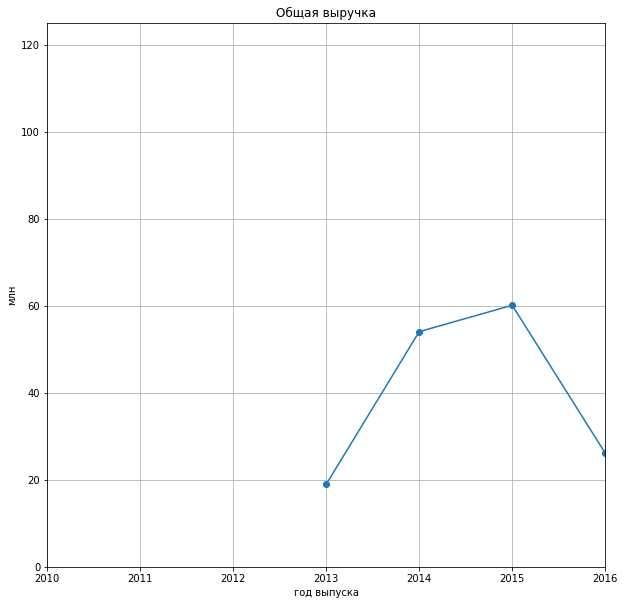

In [39]:
data_actual_XOne = data_in_XOne.pivot_table(index='year_of_release',
                                values='total_sales',
                                aggfunc={'sum'})
data_actual_XOne = data_actual_XOne.rename(columns={'sum':'total_sales' })
display(data_actual_XOne)

data_actual_XOne.plot(y = 'total_sales',marker='o', grid=True, figsize=(10, 10), legend=False)
plt.title('Общая выручка')
plt.xlabel('год выпуска')
plt.ylabel('млн')
plt.xlim(2010, 2016)
plt.ylim(0, 125)
plt.show()

по продажам явно лидирует актуальное поколение PS4  в несколько раз превышая показатели остальных платформ. потенциально прибыльными являются PS4 и XOne. так как их цикл существования начался относительно недавно и прибыли достаточно высоки для того чтобы их использование было экономически выгодно

<AxesSubplot:>

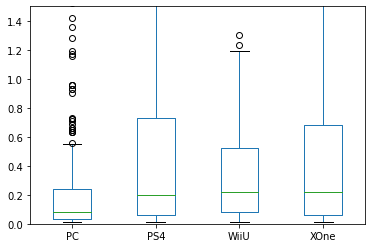

In [40]:
data_in_work.pivot_table(index = 'name',
                         columns = 'platform',
                         values = 'total_sales',
                         aggfunc = 'sum').plot(kind='box', ylim=(0,1.5))

Можно заметить что медианные значения всех трех оставшихся платформ совпадают почти полностью, поэтому их все можно считать достаточно потенциально прибыльными в дальнейшем. Однако медианное значение спроса на продукцию для платформы PC ниже среднего, однако стоит отметить общую стабильность спроса на данную платформу на протяжении всего срока, рассматриваемого датафреймом, поэтому считаю рациональным ее сохранение.

### Влияние отзывов на продажи

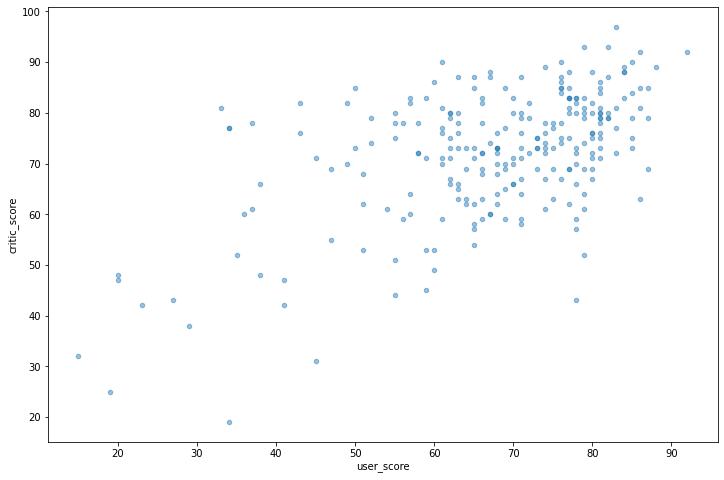

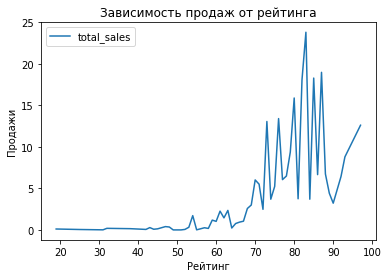

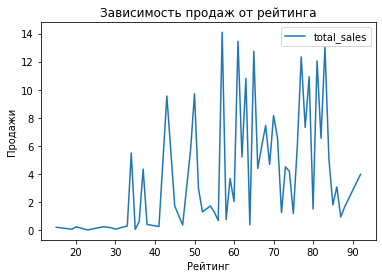

In [41]:

data_in_PS4.plot(x='user_score', y='critic_score', kind='scatter', figsize=(12, 8), legend=True, alpha = 0.45)
PS4_correl = data_in_PS4[['critic_score','user_score', 'total_sales']]


dataPS4 = data_in_PS4.pivot_table(index = 'critic_score', values = 'total_sales', aggfunc = ['sum']).plot(y = 'sum', legend=True)
plt.title('Зависимость продаж от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

plt.show()
dataPS4 = data_in_PS4.pivot_table(index = 'user_score', values = 'total_sales', aggfunc = ['sum']).plot(y = 'sum', legend=True)
plt.title('Зависимость продаж от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

plt.show()

In [42]:
PS4_correl.corr()


,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


По графику можно сделать вывод о том, что оценки большей части игр у критиков и у игроков совпадают.  
Таблица показывает иную ситуацию, зависимость продаж от оценок экспертов намного больше чем от оценок игроков

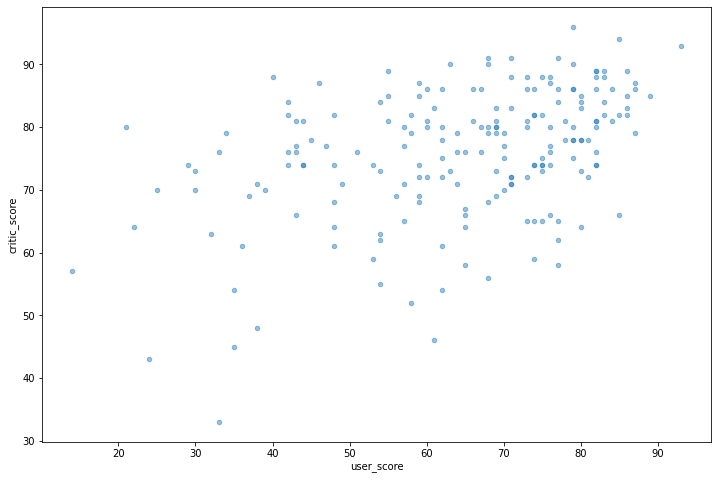

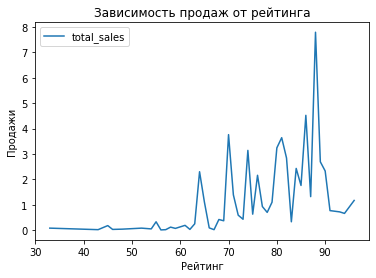

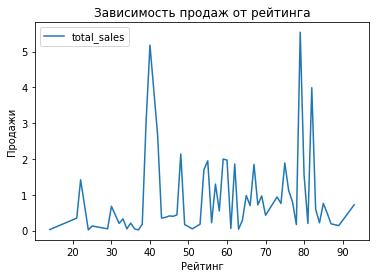

In [43]:


data_in_PС.plot(x='user_score', y='critic_score', kind='scatter', figsize=(12, 8), legend=True, alpha = 0.45)
PС_correl = data_in_PС[['critic_score','user_score', 'total_sales']]



dataPС = data_in_PС.pivot_table(index = 'critic_score', values = 'total_sales', aggfunc = ['sum']).plot(y = 'sum', legend=True)
plt.title('Зависимость продаж от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

plt.show()
dataPС = data_in_PС.pivot_table(index = 'user_score', values = 'total_sales', aggfunc = ['sum']).plot(y = 'sum', legend=True)
plt.title('Зависимость продаж от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

plt.show()

In [44]:
PС_correl.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.432587,0.237243
user_score,0.432587,1.000000,-0.121867
total_sales,0.237243,-0.121867,1.000000


По графику можно сделать вывод о том, что оценки большей части игр у критиков и у игроков совпадают однако присутсвует смещение в сторону большего доверия к критикам.
Таблица показывает иную ситуацию, зависимость продаж от оценок экспертов намного больше чем от оценок игроков, однако коэффициент корелляции низок и связь между ними не сильная.

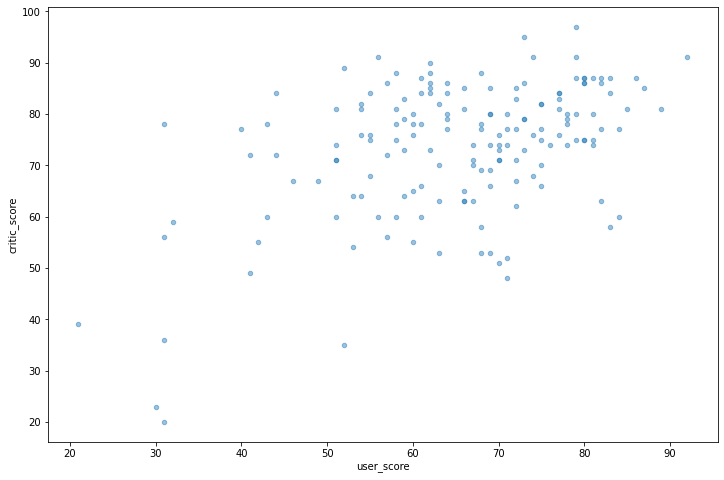

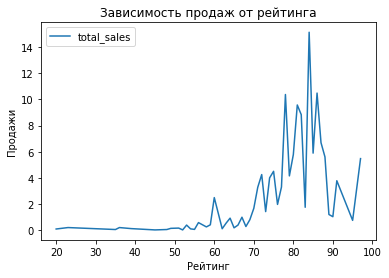

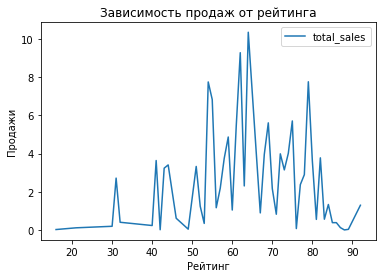

In [45]:

data_in_XOne.plot(x='user_score', y='critic_score', kind='scatter', figsize=(12, 8), legend=True, alpha = 0.45)
XOne_correl = data_in_XOne[['critic_score','user_score', 'total_sales']]


dataXOne = data_in_XOne.pivot_table(index = 'critic_score', values = 'total_sales', aggfunc = ['sum']).plot(y = 'sum', legend=True)
plt.title('Зависимость продаж от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

plt.show()
dataXOne = data_in_XOne.pivot_table(index = 'user_score', values = 'total_sales', aggfunc = ['sum']).plot(y = 'sum', legend=True)
plt.title('Зависимость продаж от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

plt.show()

In [46]:
XOne_correl.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


По графику можно сделать вывод о том, что оценки большей части игр у критиков и у игроков несовпадают.  
Таблица показывает иную ситуацию, зависимость продаж от оценок экспертов намного больше чем от оценок игроков

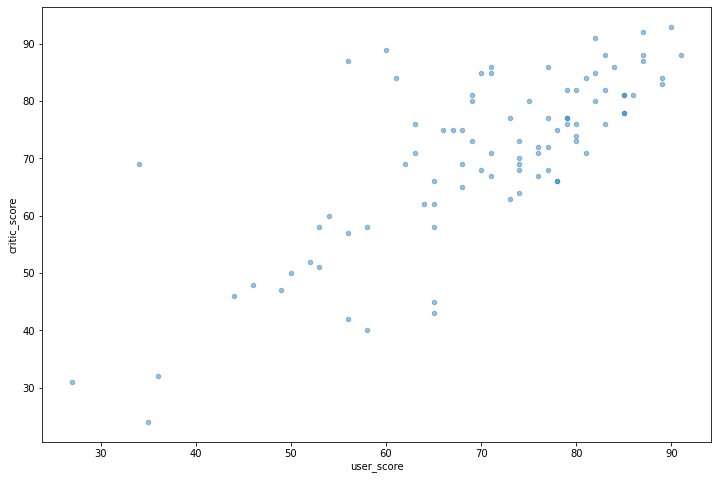

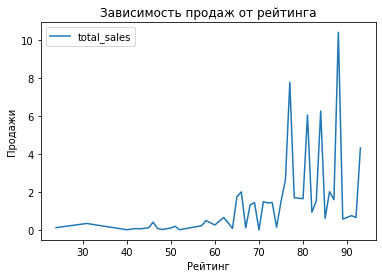

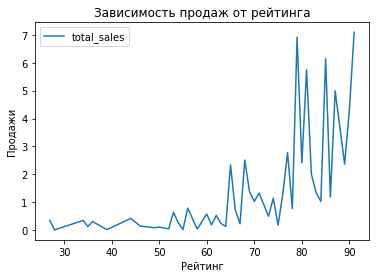

In [47]:

data_in_WiiU.plot(x='user_score', y='critic_score', kind='scatter', figsize=(12, 8), legend=True, alpha = 0.45)
WiiU_correl = data_in_WiiU[['critic_score','user_score', 'total_sales']]


dataWiiU = data_in_WiiU.pivot_table(index = 'critic_score', values = 'total_sales', aggfunc = ['sum']).plot(y = 'sum', legend=True)
plt.title('Зависимость продаж от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

plt.show()
dataWiiU = data_in_WiiU.pivot_table(index = 'user_score', values = 'total_sales', aggfunc = ['sum']).plot(y = 'sum', legend=True)
plt.title('Зависимость продаж от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

plt.show()

In [48]:
WiiU_correl.corr()

,critic_score,user_score,total_sales
critic_score,1.00000,0.770080,0.348380
user_score,0.77008,1.000000,0.400219
total_sales,0.34838,0.400219,1.000000


По графику можно сделать вывод о том, что оценки большей части игр у критиков и у игроков совпадают.  
Таблица показывает иную ситуацию, зависимость продаж от оценок экспертов меньше чем от оценок игроков, но разница не велика.

Вывод: Можно сказать что для отобранных нами платформ большое влияние на продажи оказывают оценки критиков, однако в случае с WiiU влияние игроков все же выше. Скорее всего это связано с не столь большим распространении данной платформы.

### Влияние жанра на продажи

<AxesSubplot:xlabel='genre'>

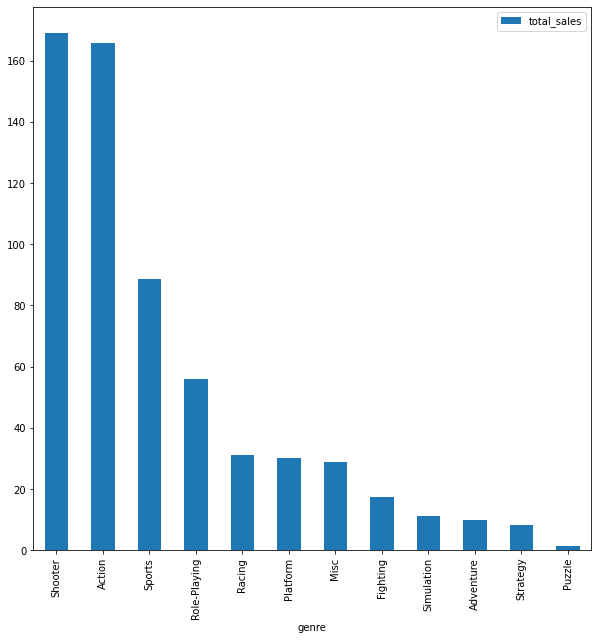

In [49]:
data_in_work.pivot_table(index = 'genre',
                        values = 'total_sales',
                        aggfunc = 'sum').sort_values(ascending=False,
                                                     by = 'total_sales').plot(kind='bar',
                                                                              figsize=(10,10),
                                                                              y= 'total_sales')

,median,total_sales
genre,,
Shooter,0.465,169.17
Action,0.140,165.62
Sports,0.290,88.77
Role-Playing,0.200,56.08
Racing,0.110,31.03
Platform,0.310,30.29
Misc,0.180,28.81
Fighting,0.180,17.49
Simulation,0.120,11.34


<AxesSubplot:xlabel='genre'>

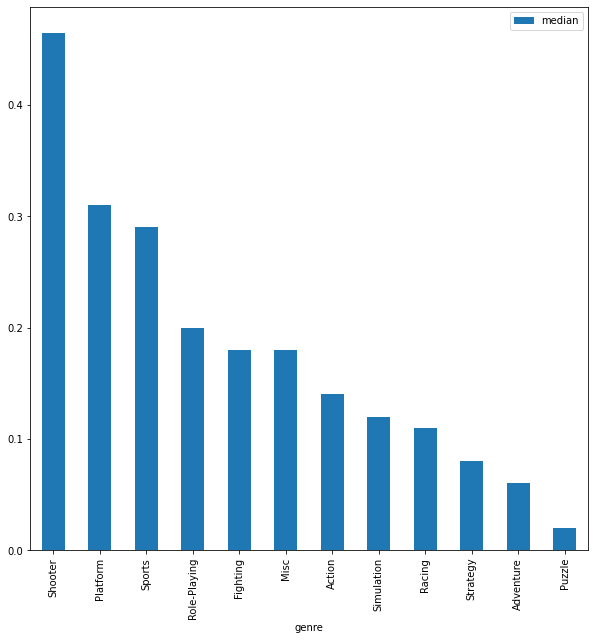

In [50]:
data_ac = data_in_work.pivot_table(index=['genre'],
                                values='total_sales',
                                aggfunc={'sum','median'})
data_ac = data_ac.rename(columns={'sum':'total_sales' })



display(data_ac.sort_values(by = 'total_sales', ascending=False ))
data_ac.sort_values(by='median', ascending=False).plot(kind='bar', figsize=(10,10), y= 'median')

Можно сделать вывод о том что наиболее популярным среди всех жанров является жанр Action, после которого второе и третье место делят Shooter и Role-Playing.   
Наименее прибыльные- Fighting и различные виды Adventure

Самые эффективные для продажи Shooter и Platform

## Составление регионального портрета потребителя

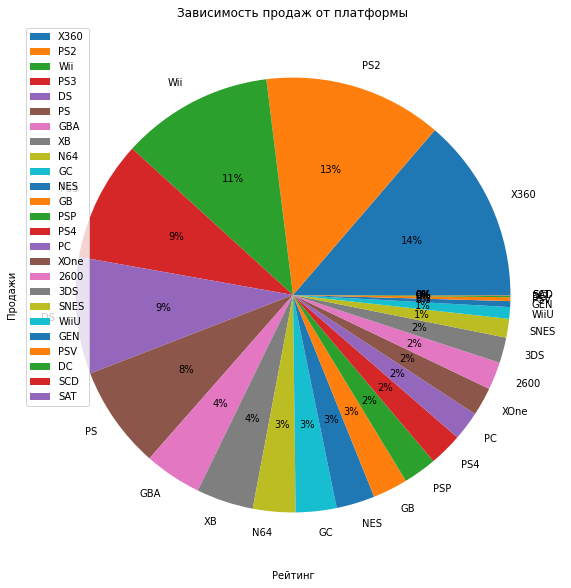

In [51]:
na=data.pivot_table(index = 'platform',
                 values = 'na_sales',
                 aggfunc = 'sum')
na=na.sort_values(ascending=False,by = 'na_sales')
na.plot(kind = 'pie',autopct = '%1.0f%%',figsize=(15,10),subplots=True)
plt.title('Зависимость продаж от платформы')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

plt.show()

In [52]:
nam=data.groupby('platform')['na_sales'].sum().nlargest(5)
display(nam)

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

In [53]:
nar=data[data['platform'] !='X360']
nar=nar[nar['platform'] !='PS2']
nar=nar[nar['platform'] !='Wii']
nar=nar[nar['platform'] !='PS3']
nar=nar[nar['platform'] !='DS']
nar['na_sales'].sum()


1941.4700000000003

In [54]:

nam.loc[len(nam.index)] =  1941.47 
display(nam)

platform
X360     602.47
PS2      583.84
Wii      496.90
PS3      393.49
DS       382.40
5       1941.47
Name: na_sales, dtype: float64

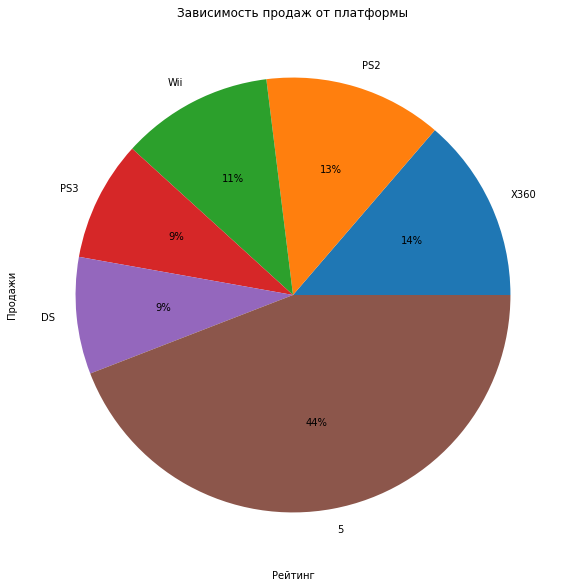

In [55]:
nam.plot(kind = 'pie',autopct = '%1.0f%%',figsize=(15,10),subplots=True)
plt.title('Зависимость продаж от платформы')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27
Racing,359.35
Role-Playing,330.81
Fighting,223.36
Simulation,181.92


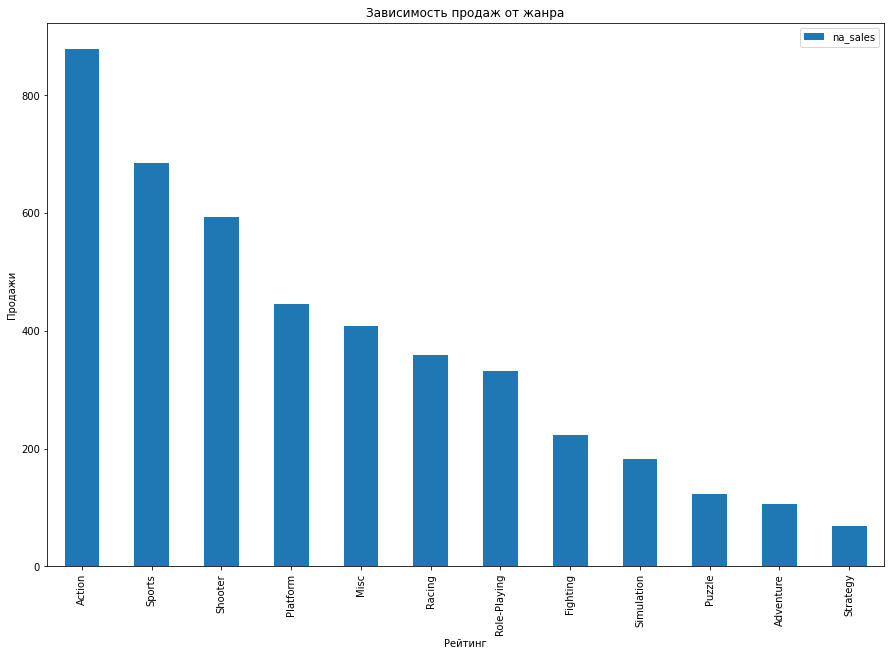

In [56]:
d1=data.pivot_table(index = 'genre',
                 values = 'na_sales',
                 aggfunc = 'sum').sort_values(ascending=False,
                                              by = 'na_sales')
d1.plot(kind = 'bar',figsize=(15,10))
display(d1)
plt.title('Зависимость продаж от жанра')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

plt.show()
datana=data




В американском сегменте  
Наиболее преобладающие платформы-Xbox и PS2  
Самые популярные жанры Action и Sports

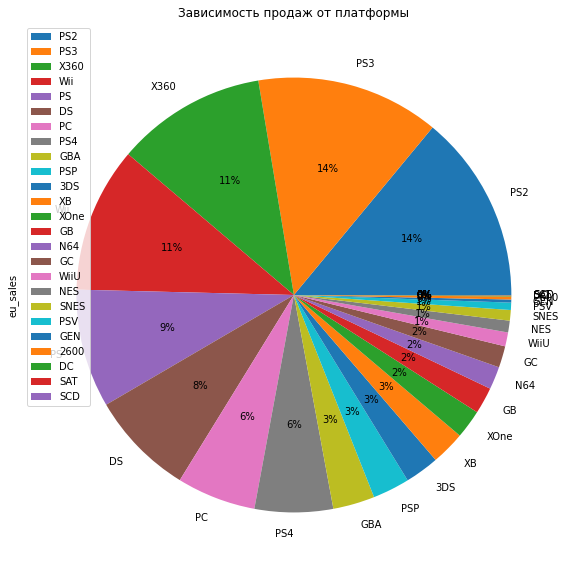

In [57]:
eu=data.pivot_table(index = 'platform',
                 values = 'eu_sales',
                 aggfunc = 'sum')
eu=eu.sort_values(ascending=False,by = 'eu_sales')
eu.plot(kind = 'pie',autopct = '%1.0f%%',figsize=(15,10),subplots=True)
plt.title('Зависимость продаж от платформы')


plt.show()



In [58]:
nam=data.groupby('platform')['eu_sales'].sum().nlargest(5)
display(nam)


platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

In [59]:
nar=data[data['platform'] !='X360']
nar=nar[nar['platform'] !='PS2']
nar=nar[nar['platform'] !='Wii']
nar=nar[nar['platform'] !='PS3']
nar=nar[nar['platform'] !='PS']
nar['eu_sales'].sum()


1007.98

In [60]:

nam.loc[len(nam.index)] =  1941.47 
display(nam)

platform
PS2      339.29
PS3      330.29
X360     270.76
Wii      262.21
PS       213.61
5       1941.47
Name: eu_sales, dtype: float64

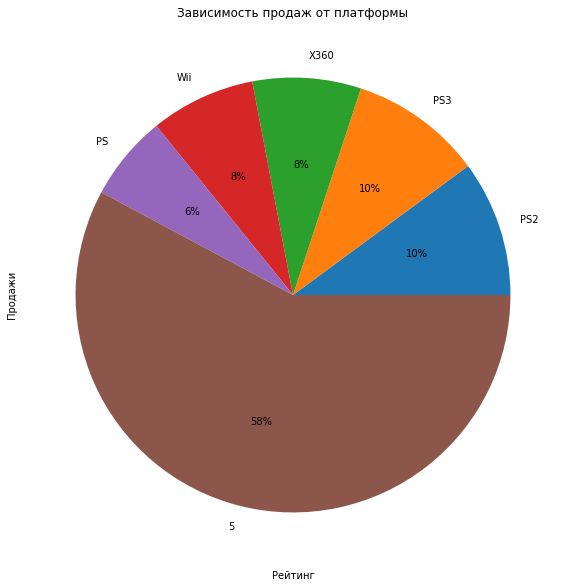

In [61]:
nam.plot(kind = 'pie',autopct = '%1.0f%%',figsize=(15,10),subplots=True)
plt.title('Зависимость продаж от платформы')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

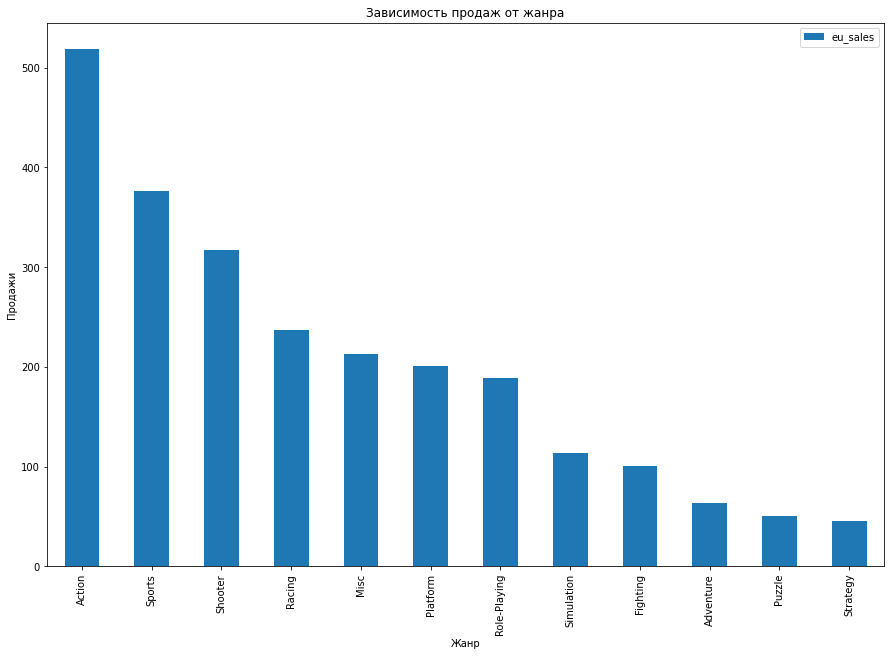

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74
Platform,200.35
Role-Playing,188.71
Simulation,113.52
Fighting,100.33


In [62]:
d1=data.pivot_table(index = 'genre',
                 values = 'eu_sales',
                 aggfunc = 'sum').sort_values(ascending=False,
                                              by = 'eu_sales')
d1.plot(kind = 'bar',figsize=(15,10))

plt.title('Зависимость продаж от жанра')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

plt.show()

display(d1)

В европейском сегменте  
Наиболее преобладающие платформы-Xbox и PS3 , PS2 . Скорее всего это связано с тем что данные платформы наиболее сильно известны и производятся крупными компаниями с большими рекламными компаниями при выпуске партий.  
Самые популярные жанры Action и Sports

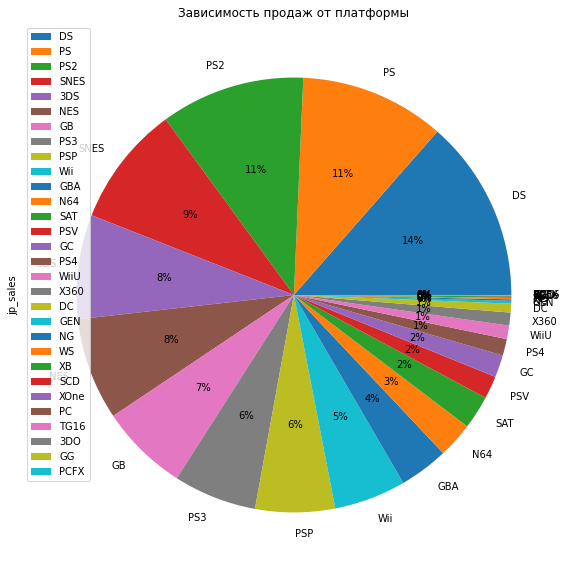

In [63]:
jp=data.pivot_table(index = 'platform',
                 values = 'jp_sales',
                 aggfunc = 'sum').sort_values(ascending=False,
                                              by = 'jp_sales')
jp.plot(kind = 'pie',autopct = '%1.0f%%',figsize=(15,10),subplots=True)
plt.title('Зависимость продаж от платформы')

plt.show()

In [64]:

nam=data.groupby('platform')['jp_sales'].sum().nlargest(5)
display(nam)


platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

In [65]:
nar=data[data['platform'] !='PS']
nar=nar[nar['platform'] !='PS2']
nar=nar[nar['platform'] !='DS']
nar=nar[nar['platform'] !='SNES']
nar=nar[nar['platform'] !='3DS']
nar['jp_sales'].sum()


625.53

In [66]:

nam.loc[len(nam.index)] =  625.53
display(nam)

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
5       625.53
Name: jp_sales, dtype: float64

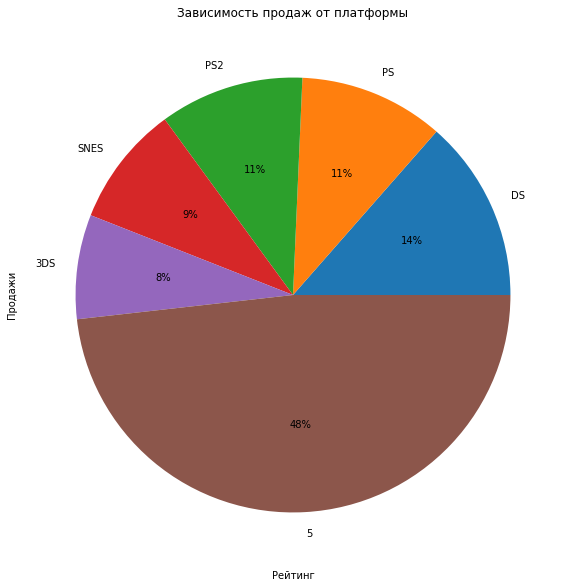

In [67]:
nam.plot(kind = 'pie',autopct = '%1.0f%%',figsize=(15,10),subplots=True)
plt.title('Зависимость продаж от платформы')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

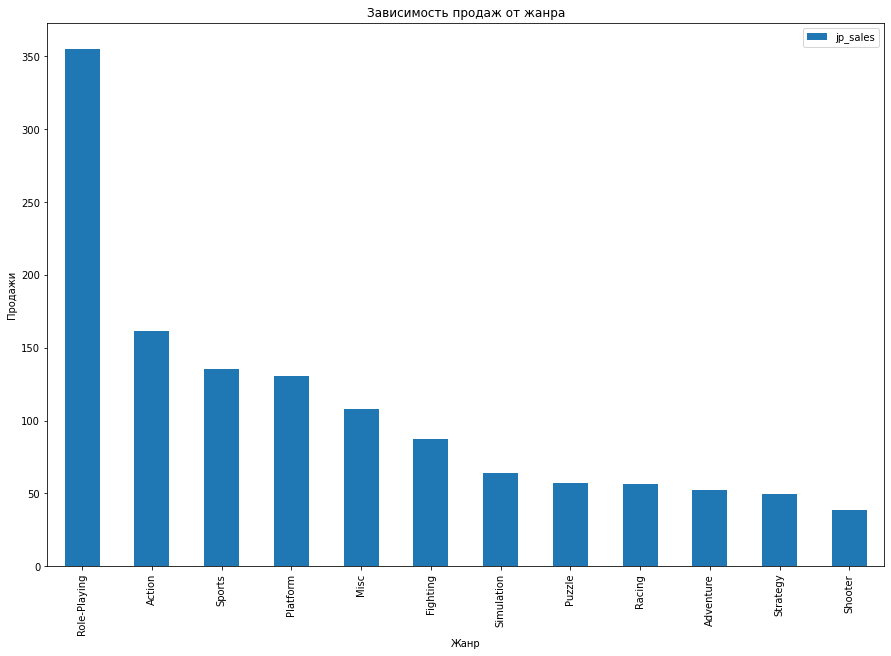

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11
Fighting,87.48
Simulation,63.80
Puzzle,57.31
Racing,56.71


In [68]:
d1= data.pivot_table(index = 'genre',
                 values = 'jp_sales',
                 aggfunc = 'sum').sort_values(ascending=False,
                                              by = 'jp_sales')
d1.plot(kind = 'bar',figsize=(15,10))
plt.title('Зависимость продаж от жанра')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

plt.show()
display(d1)

В японсом сегменте  
Наиболее преобладающие платформы- различные японские линейки приставок, которые не имеют столь большого распространения на западе, скорее всего это связано с доступностью данных устройств в этом районе.
Самые популярные жанры Action и Role-Playing возможно это связано с особенностями культуры

Влияние рейтинга  ESRBна продажи

In [69]:

ESRB = data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
display(ESRB)

,eu_sales,jp_sales,na_sales
rating,,,
AO,0.61,0.00,1.26
E,710.25,198.11,1292.99
E10+,188.52,40.20,353.32
EC,0.11,0.00,1.53
K-A,0.27,1.46,2.56
M,483.97,64.24,748.48
RP,0.08,0.00,0.00
T,427.03,151.40,759.75
пусто,613.30,841.93,1240.68


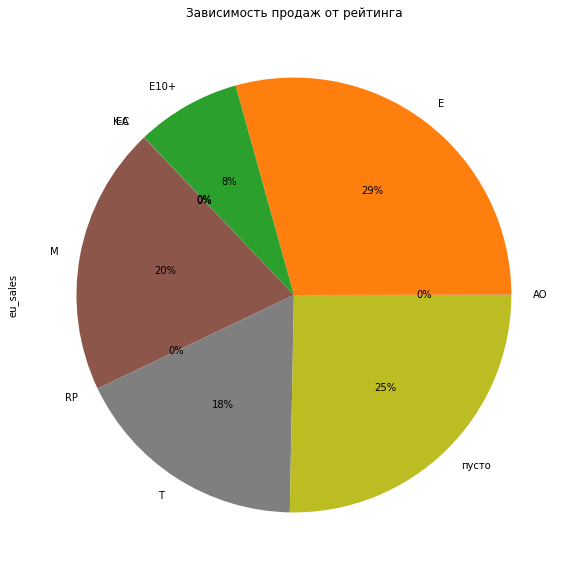

In [70]:
ESRB['eu_sales'].plot(kind = 'pie',autopct = '%1.0f%%',figsize=(15,10),subplots=True)
plt.title('Зависимость продаж от рейтинга')

plt.show()

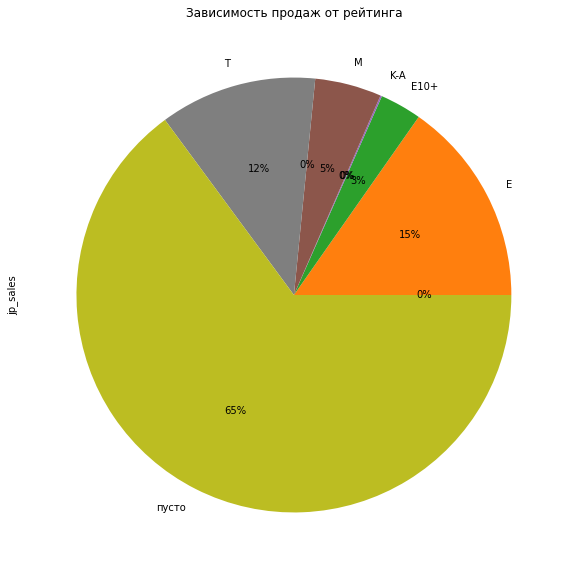

In [71]:
ESRB['jp_sales'].plot(kind = 'pie',autopct = '%1.0f%%',figsize=(15,10),subplots=True)
plt.title('Зависимость продаж от рейтинга')

plt.show()

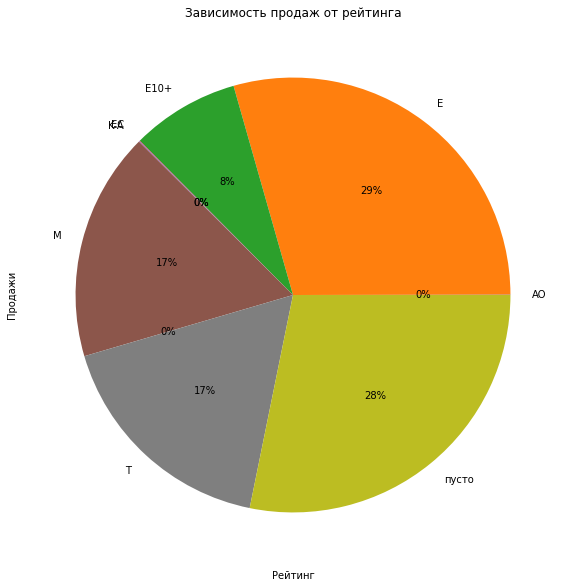

In [72]:
ESRB['na_sales'].plot(kind = 'pie',autopct = '%1.0f%%',figsize=(15,10),subplots=True)
plt.title('Зависимость продаж от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

plt.show()

Можно сказать что рейтинг влияет на продажи в регионах, к примеру игры с рейтингами EC и RP продавались только в американском регионе, также в японии не продавались продукты с рейтингом AO/

Также стоит заметить что весьма значительная часть игр не имеет рейтинга совсем.

## Гипотезы

### Гипотеза 1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H0- Средние пользовательские рейтинги платформ Xbox One и PC равны  

H1- Средние пользовательские рейтинги платформ Xbox One и PC неравны

In [73]:
data_X1= data.query("platform == 'XOne'")
data_X1=data_X1.query('user_score >= 0')
data_X1=data_X1['user_score']
#Отделяем данные для анализа гипотезы 

data_PC= data.query("platform == 'PC'")
data_PC=data_PC.query('user_score >= 0')
data_PC=data_PC['user_score']


print('Средний пользовательский рейтинг платформы Xbox One:', data_PC.mean())
print('Средний пользовательский рейтинг платформы PC', data_X1.mean())

results = st.ttest_ind(data_X1,data_PC, equal_var=False)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг платформы Xbox One: 70.62467532467532
Средний пользовательский рейтинг платформы PC 65.21428571428571
4.935072360183449e-06
Отвергаем нулевую гипотезу


<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Верно определена нулевая и альтернативная гипотезы, выбран правильный метод для проведения теста.

</div>

Нулевую гипотезу отвергаем, подтверждая то что средний пользовательский рейтинг у этих платформ разный.


### Гипотеза 2

H0- Средние пользовательские рейтинги жанров Action и Sports неравны

H1- Средние пользовательские рейтинги платформ Action и Sports равны

In [74]:
data_Action= data.query("genre == 'Action'")
data_Action=data_Action.query('user_score >= 0')
data_Action=data_Action['user_score']
#Отделяем данные для анализа гипотезы 

data_Sports= data.query("genre == 'Sports'")
data_Sports=data_Sports.query('user_score >= 0')
data_Sports=data_Sports['user_score']


print('Средний пользовательский рейтинг Action:', data_Action.mean())
print('Средний пользовательский рейтинг Sports', data_Sports.mean())

results = st.ttest_ind(data_Action,data_Sports, equal_var=True)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг Action: 70.54043715846994
Средний пользовательский рейтинг Sports 69.61196736174071
0.10406951359050057
Не удалось отвергнуть нулевую гипотезу


<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Хорошо, что убраны пустые значения.

</div>

Нулевую гипотезу отвергнуть не удалось, поэтому можно утверждать о том что рейтинги у этих жанров различаются

## Вывод по работе

Общим выводом может послужить следующее:
1. Главными факторами влияния на успех продажи игры являются: Возрастной рейтинг, наиолее распространенная в конкретном регионе платформа, Жанр игры для конкретного региона.
2. В рассмотренном случае, который требовал подбора наиболле актуальных платформ для 2017 года, были отобраны PS4, PC, XOne, Wii,PSV, 3DS.
3. Было выяснено что средний период актуальности одной платформы- 10 лет, однаако в связи с ускоренным темпом развиятия актуальные игры выходят на платформы в течении примерно 5 лет.
4. По продажам было выяснено что наиболее популярны жанры: Action, Sports и Shooter. Наименее популярны Puzzle
5. Возрастной рейтинг имеет большое влияние на популярность продукта.


Северная Америка:  
Плафторма: PS4, XOne 
Жанр: Shooter, Platform  
Рейтинг: m, e,t

Европа:  
Плафторма: PS4, XOne  
Жанр: Shooter, Racing  
Рейтинг: m, e  

Япония:  
Плафторма: PS4, Wiiu
Жанр: Role-playing, Fighting  
Рейтинг:  m, e,t

В ходе работы было проведено:
1. Предобработка данных
    1. Импортированы инструменты для предобработки данных, их визуализации и расчетов значений.
    2. Форматирование названий столбцов.
    3. Обработаны типы данных
    4. Устранены дубликаты и пропуски, в случае где это было рационально.
    5. Добавлен столбец с общей выручкой
2. Исследовательский анализ данных:
    1. Проверили распределение количества выпускаемых игр на год выпуска. (Выяснили что пик был в 2011 году, что скорее всего связано с выходом нового поколения консолей)
    2. Проверили распределение количества выпускаемых игр на платформу.
    3. Выяснили средний срок существования платформы, в связи со спецификой задачи ограничили рассматриваемый период 2011-2016 годами.
    4. Вывели датафрейм с заданными условиями и рассмотрели данные в нем.
    5. Рассмотрели влияние рейтинга критиков и игроков на продажи (Можно сказать что для отобранных нами платформ большое влияние на продажи оказывают оценки критиков)
3. Был составлен региональный портрет покупателя(представлен выше)
4. Проверили гипотезы
    1. Отвергли гипотезу о равенстве средних рейтингов игроков у платформ Xbox One и PC
    2. Подтвердили гипотезу о том что средние пользовательские рейтинги жанров Action и Sports неравны